In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_folder_path = 'C:/Users/TAAESJU2/thesis_documents/Project_Juan/'

In [3]:
volunteers = pd.read_csv(data_folder_path + 'Base_info.csv')
volunteers

,PPnr,Age,Gender,km_per_week,comf_speed
0,1,21,m,25,10.5
1,2,24,f,16,9.0
2,3,24,f,30,9.5
3,4,33,f,8,10.5
4,5,21,m,21,11.0
5,6,26,m,40,11.5
6,7,34,f,35,10.0
7,8,26,f,23,9.0
8,9,39,f,50,11.0
9,10,25,f,30,10.5


### RAW_dualbelt

In [4]:
pd.read_csv(data_folder_path + 'RAW_dualbelt/NP01_R_1.csv').head()

,time,Fx,Fy,Fz,COPx,COPy,pacing,footstrike
0,0.000,-90.232,-127.233,1737.469,-0.04018,0.28414,0,0
1,0.002,-107.536,-69.598,1731.104,-0.02988,0.30349,0,0
2,0.004,-88.816,-100.793,1740.539,-0.03419,0.27675,0,0
3,0.006,-46.717,-36.228,1730.448,-0.04171,0.29531,0,0
4,0.008,-74.460,11.661,1730.951,-0.03664,0.29063,0,0


In [5]:
pd.read_csv(data_folder_path + 'RAW_dualbelt/PNPfast_R_1.csv').head()

,time,Fx,Fy,Fz,COPx,COPy,pacing,footstrike
0,0.000,-6.988,58.909,91.407,0.32527,0.47447,1,0
1,0.002,-16.044,24.153,108.611,0.37850,0.33465,0,0
2,0.004,-11.528,-9.401,121.881,0.35801,0.21589,0,0
3,0.006,-24.418,14.197,91.720,0.47600,0.58341,0,0
4,0.008,-33.502,-42.647,130.707,0.28986,0.30084,0,1


In [6]:
pd.read_csv(data_folder_path + 'RAW_dualbelt/PNPpref_R_1.csv').head()

,time,Fx,Fy,Fz,COPx,COPy,pacing,footstrike
0,0.000,4.023,47.404,66.742,0.39145,0.23338,1,0
1,0.002,2.500,33.250,79.876,0.26764,0.09846,0,0
2,0.004,1.331,11.696,84.419,0.13026,0.06111,0,0
3,0.006,-0.876,47.814,69.916,0.16374,0.48359,0,0
4,0.008,21.117,6.651,73.069,0.06998,-0.12067,0,0


In [7]:
pd.read_csv(data_folder_path + 'RAW_dualbelt/CP103_R_1.csv').head()

,time,Fx,Fy,Fz,COPx,COPy,pacing,footstrike
0,0.000,-13.103,121.638,1166.162,0.23196,0.16555,0,0
1,0.002,4.033,147.689,1151.571,0.23245,0.19291,0,0
2,0.004,30.929,157.398,1139.661,0.23009,0.18222,0,0
3,0.006,11.832,177.075,1135.944,0.22704,0.15735,0,0
4,0.008,15.002,199.717,1096.091,0.22837,0.17959,0,0


In [8]:
pd.read_csv(data_folder_path + 'RAW_dualbelt/IP103_R_1.csv').head()

,time,Fx,Fy,Fz,COPx,COPy,pacing,footstrike
0,0.000,-144.270,-114.587,1067.838,0.20228,0.42139,0,0
1,0.002,-148.767,-156.344,1090.324,0.22027,0.39966,0,0
2,0.004,-65.704,-192.323,1091.356,0.23088,0.42555,0,0
3,0.006,-95.656,-231.761,1115.340,0.24071,0.40125,0,0
4,0.008,-117.752,-244.874,1150.044,0.23988,0.38724,0,0


In [9]:
pd.read_csv(data_folder_path + 'RAW_dualbelt/CP110_R_1.csv').head()

,time,Fx,Fy,Fz,COPx,COPy,pacing,footstrike
0,0.000,-62.479,43.371,68.760,0.57930,0.46038,0,0
1,0.002,-52.894,37.794,63.422,0.63136,0.01011,0,0
2,0.004,-31.859,28.584,50.446,0.68677,0.27337,0,0
3,0.006,-32.270,12.432,71.593,0.58917,0.32859,0,0
4,0.008,-22.599,17.565,83.191,0.49361,0.04620,0,0


In [10]:
pd.read_csv(data_folder_path + 'RAW_dualbelt/IP110_R_1.csv').head()

,time,Fx,Fy,Fz,COPx,COPy,pacing,footstrike
0,0.000,-54.405,87.458,172.369,0.37108,0.12353,0,0
1,0.002,-39.892,72.436,148.615,0.38256,-0.14536,0,0
2,0.004,-43.686,92.338,123.085,0.48661,0.13412,0,0
3,0.006,-41.862,69.179,108.605,0.41941,0.03614,0,0
4,0.008,-30.899,64.278,101.426,0.37435,0.18320,0,0


### RAW_headset

In [11]:
pd.read_csv(data_folder_path + 'RAW_headset/NP01_R_2_headset.csv').head()

,time,ax,ay,az,timestamp,beepbop
0,471.312,-6.858627,4.799749,-1.230425,0,471.31
1,471.314,-6.454296,4.489725,-1.188051,0,471.31
2,471.316,-6.066629,4.093151,-1.162367,0,471.31
3,471.318,-5.684240,3.753069,-1.140020,0,471.31
4,471.320,-5.324033,3.369685,-1.071503,0,471.31


In [12]:
pd.read_csv(data_folder_path + 'RAW_headset/PNPfast_R_2_headset.csv').head()

,time,ax,ay,az,timestamp,beepbop
0,14.758,-2.941207,0.778647,-0.028842,0,14.697
1,14.760,-2.598074,0.533161,0.002640,0,14.697
2,14.762,-2.262355,0.314842,-0.021209,0,14.697
3,14.764,-1.915347,0.090039,-0.052178,0,14.697
4,14.766,-1.582235,-0.074288,-0.049884,0,14.697


In [13]:
pd.read_csv(data_folder_path + 'RAW_headset/PNPpref_R_2_headset.csv').head()

,time,ax,ay,az,timestamp,beepbop
0,14.958,-7.115734,8.003204,0.279845,0,14.894
1,14.960,-4.587226,7.097754,0.272158,0,14.894
2,14.962,-3.090340,6.464921,0.500347,0,14.894
3,14.964,-2.639375,5.878021,0.604168,0,14.894
4,14.966,-3.113178,5.484114,0.622502,0,14.894


### Calculated Variables

In [14]:
pd.read_csv(data_folder_path + 'calculated_variables/NP01_R_1_calculated.csv').head(10)

,interval_footstrikes,interval_beeps,step_frequency,pacing_frequency
0,0.392,NaN,153.061,NaN
1,0.396,NaN,151.515,NaN
2,0.412,NaN,145.631,NaN
3,0.404,NaN,148.515,NaN
4,0.402,NaN,149.254,NaN
5,0.390,NaN,153.846,NaN
6,0.404,NaN,148.515,NaN
7,0.388,NaN,154.639,NaN
8,0.410,NaN,146.341,NaN
9,0.396,NaN,151.515,NaN


In [15]:
pd.read_csv(data_folder_path + 'calculated_variables/NP02_R_1_calculated.csv').head()

,interval_footstrikes,interval_beeps,step_frequency,pacing_frequency
0,0.372,NaN,161.290,NaN
1,0.384,NaN,156.250,NaN
2,0.366,NaN,163.934,NaN
3,0.384,NaN,156.250,NaN
4,0.370,NaN,162.162,NaN


In [16]:
pd.read_csv(data_folder_path + 'calculated_variables/PNPfast_R_1_calculated.csv').head()

,interval_footstrikes,interval_beeps,step_frequency,pacing_frequency
0,0.364,0.362,164.835,165.746
1,0.380,0.360,157.895,166.667
2,0.366,0.362,163.934,165.746
3,0.376,0.360,159.574,166.667
4,0.342,0.362,175.439,165.746


In [17]:
pd.read_csv(data_folder_path + 'calculated_variables/PNPpref_R_1_calculated.csv').head()

,interval_footstrikes,interval_beeps,step_frequency,pacing_frequency
0,0.384,0.402,156.250,149.254
1,0.306,0.400,196.078,150.000
2,0.246,0.402,243.902,149.254
3,0.310,0.400,193.548,150.000
4,0.350,0.402,171.429,149.254


In [18]:
pd.read_csv(data_folder_path + 'calculated_variables/CP103_R_1_calculated.csv').head()

,interval_footstrikes,interval_beeps,step_frequency,pacing_frequency
0,0.372,0.354,161.290,169.492
1,0.364,0.350,164.835,171.429
2,0.360,0.354,166.667,169.492
3,0.362,0.350,165.746,171.429
4,0.382,0.354,157.068,169.492


In [19]:
pd.read_csv(data_folder_path + 'calculated_variables/IP103_R_1_calculated.csv').head()

,interval_footstrikes,interval_beeps,step_frequency,pacing_frequency
0,0.374,0.354,160.428,169.492
1,0.368,0.350,163.043,171.429
2,0.372,0.352,161.290,170.455
3,0.370,0.352,162.162,170.455
4,0.376,0.352,159.574,170.455


In [20]:
pd.read_csv(data_folder_path + 'calculated_variables/CP110_R_1_calculated.csv').head()

,interval_footstrikes,interval_beeps,step_frequency,pacing_frequency
0,0.372,0.326,161.290,184.049
1,0.356,0.326,168.539,184.049
2,0.364,0.326,164.835,184.049
3,0.364,0.326,164.835,184.049
4,0.368,0.326,163.043,184.049


In [21]:
pd.read_csv(data_folder_path + 'calculated_variables/IP110_R_1_calculated.csv')

,interval_footstrikes,interval_beeps,step_frequency,pacing_frequency
0,0.380,0.326,157.895,184.049
1,0.360,0.326,166.667,184.049
2,0.368,0.326,163.043,184.049
3,0.356,0.326,168.539,184.049
4,0.362,0.326,165.746,184.049
...,...,...,...,...
488,0.330,NaN,181.818,NaN
489,0.320,NaN,187.500,NaN
490,0.338,NaN,177.515,NaN
491,0.332,NaN,180.723,NaN


# Plot the pace

In [35]:
participant_number = str(2)

109 time steps
Averge step frequency 165.09751376146792


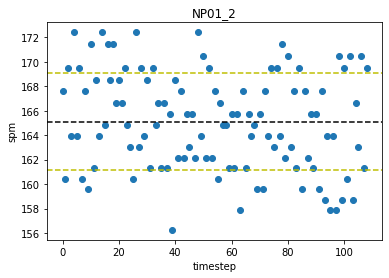

104 time steps
Averge step frequency 157.92044230769233


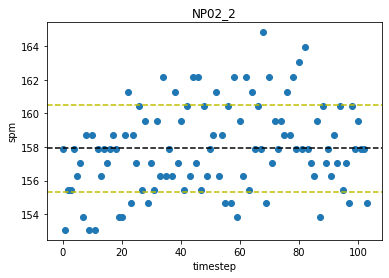

104 time steps
Averge step frequency 157.92044230769233


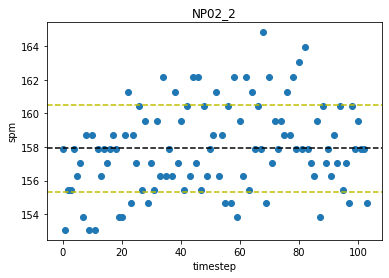

412 time steps
Averge step frequency 165.6929781553398


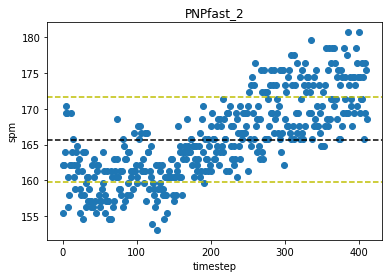

405 time steps
Averge step frequency 162.68806172839507


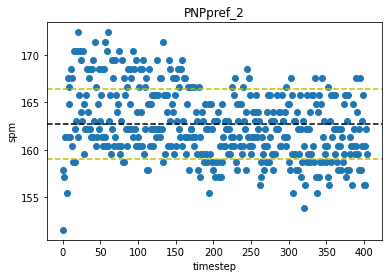

375 time steps
Averge step frequency 143.907496


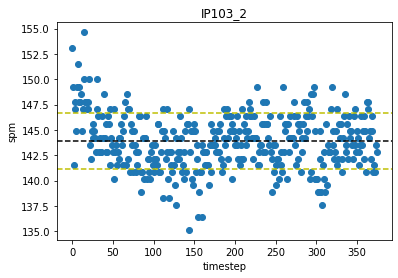

404 time steps
Averge step frequency 155.08183415841586


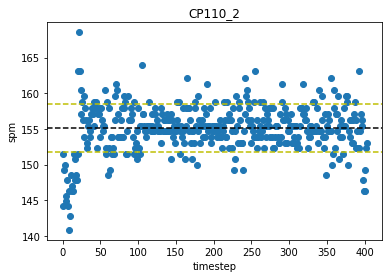

402 time steps
Averge step frequency 154.97221890547263


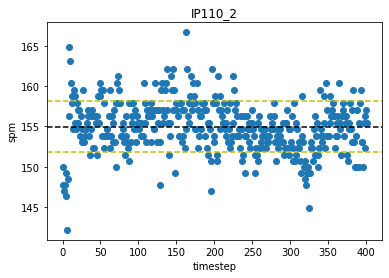

In [37]:
# plt.figure(1)
tests = ['NP01', 'NP02', 'NP02', 'PNPfast', 'PNPpref', 'IP103', 'CP110', 'IP110']
for i in range(len(tests)):
    # plt.subplot(len(tests)*100+11+i)
    plt.figure()
    no_pacing = pd.read_csv(data_folder_path + ('calculated_variables/%s_R_%s_calculated.csv')%(tests[i], participant_number))

    step_freq_1 = no_pacing['step_frequency'].to_numpy()
    print(str(len(step_freq_1)) + " time steps")
    timesteps = np.arange(0, len(step_freq_1))
    print("Averge step frequency " + str(np.mean(step_freq_1)))

    plt.scatter(timesteps, step_freq_1)
    plt.axhline(y=np.mean(step_freq_1), color='k', linestyle='--')
    plt.axhline(y=np.mean(step_freq_1) + np.std(step_freq_1), color='y', linestyle='--')
    plt.axhline(y=np.mean(step_freq_1) - np.std(step_freq_1), color='y', linestyle='--')
    # plt.ylim([140, 160])
    plt.ylabel(r'spm')
    plt.xlabel(r'timestep')
    plt.title(tests[i]+"_"+participant_number)
    plt.show()

In [24]:
len(tests)

2

380 time steps
Averge step frequency 152.5690947368421


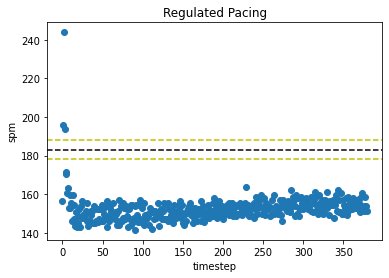

In [25]:
pacing_on = pd.read_csv(data_folder_path + 'calculated_variables/PNPpref_R_'+ participant_number +'_calculated.csv')

step_freq_2 = pacing_on['step_frequency'].to_numpy()
print(str(len(step_freq_2)) + " time steps")
timesteps = np.arange(0, len(step_freq_2))
print("Averge step frequency " + str(np.mean(step_freq_2)))

plt.scatter(timesteps, step_freq_2)
plt.axhline(y=np.mean(step_freq_1), color='k', linestyle='--')
plt.axhline(y=np.mean(step_freq_1) + np.std(step_freq_1), color='y', linestyle='--')
plt.axhline(y=np.mean(step_freq_1) - np.std(step_freq_1), color='y', linestyle='--')
# plt.ylim([140, 165])
plt.ylabel(r'spm')
plt.xlabel(r'timestep')
plt.title(r'Regulated Pacing')
plt.show()

380 time steps
Averge step frequency nan


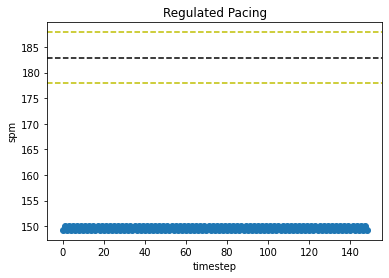

In [26]:
pacing_on = pd.read_csv(data_folder_path + 'calculated_variables/PNPpref_R_'+ participant_number +'_calculated.csv')

step_freq_3 = pacing_on['pacing_frequency'].to_numpy()
print(str(len(step_freq_3)) + " time steps")
timesteps = np.arange(0, len(step_freq_3))
print("Averge step frequency " + str(np.mean(step_freq_3)))

plt.scatter(timesteps, step_freq_3)
plt.axhline(y=np.mean(step_freq_1), color='k', linestyle='--')
plt.axhline(y=np.mean(step_freq_1) + np.std(step_freq_1), color='y', linestyle='--')
plt.axhline(y=np.mean(step_freq_1) - np.std(step_freq_1), color='y', linestyle='--')
# plt.ylim([140, 160])
plt.ylabel(r'spm')
plt.xlabel(r'timestep')
plt.title(r'Regulated Pacing')
plt.show()